#### Obs: Esse código vai gerar um arquivo de modelo treinado pelo Tensorflow 
#### Obs: Para compilar esse código é necessário que as imagens estejam mesma pasta dele

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal
from PIL import Image


### 1º Carregamos as imagens, simplificamos os canais de cores, redimensionamos e normalizamos elas

In [2]:
imagens_array = []
imagens_array_teste = []

for i in range (5000):
    nome_arquivo = f'meu_grafico_{i}.jpg'
    imagem = cv2.imread(nome_arquivo)   #Carregando a imagem
    imagem = cv2.resize(imagem, (200, 200)) #Redimensionamento da imagem
    matriz_imagem = np.array(imagem)
    canal_alpha = matriz_imagem[:, :, 0]   #Ficamos apenas com um canal de cor
    imagens_array.append(canal_alpha)

for i in range (1000):
    nome_arquivo = f'meu_grafico_{i+5000}.jpg'
    #imagem = Image.open(nome_arquivo)
    imagem = cv2.imread(nome_arquivo)
    imagem = cv2.resize(imagem, (200, 200))
    matriz_imagem = np.array(imagem)
    canal_alpha = matriz_imagem[:, :, 0]
    imagens_array_teste.append(canal_alpha)
        


In [3]:
imagens_array=np.array(imagens_array)
print(imagens_array.shape)
imagens_array_teste=np.array(imagens_array_teste)
print(imagens_array_teste.shape)

(5000, 200, 200)
(1000, 200, 200)


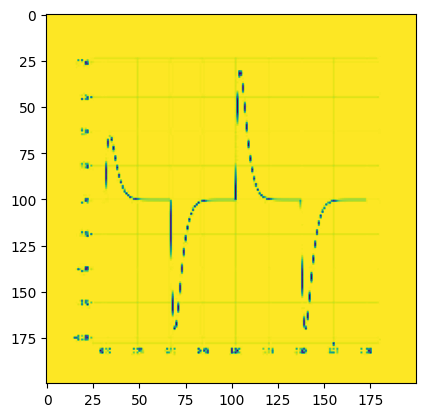

In [4]:
plt.figure()

plt.imshow(imagens_array_teste[200,:,:])
plt.grid(False)
plt.show()

In [5]:
imagens_array=imagens_array/255  #Normalização dos dados
imagens_array_teste=imagens_array_teste/255

### 2º Criamos nossa arquitetura de rede neural e realizamos o treinamento

In [6]:
import tensorflow as tf 
from tensorflow.keras import Sequential, regularizers
from tensorflow.keras.layers import Dense,Dropout, Conv2D, MaxPooling2D, Flatten


#Esse é a arquitetura da nossa rede neural:
model_2 = Sequential ([
    Conv2D(64, (3,3), activation='tanh', input_shape=(200,200,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3),activation='tanh'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='tanh'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='tanh'),
    MaxPooling2D(2,2),
    Conv2D(256,(3,3),activation='tanh'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512,activation='tanh'),
    Dense (units=3, activation='linear')
    
])


from tensorflow.keras.losses import MeanSquaredError 

model_2.compile (optimizer=tf.keras.optimizers.Adam(learning_rate=0.00006),
loss=MeanSquaredError(), 
metrics=['accuracy']) 



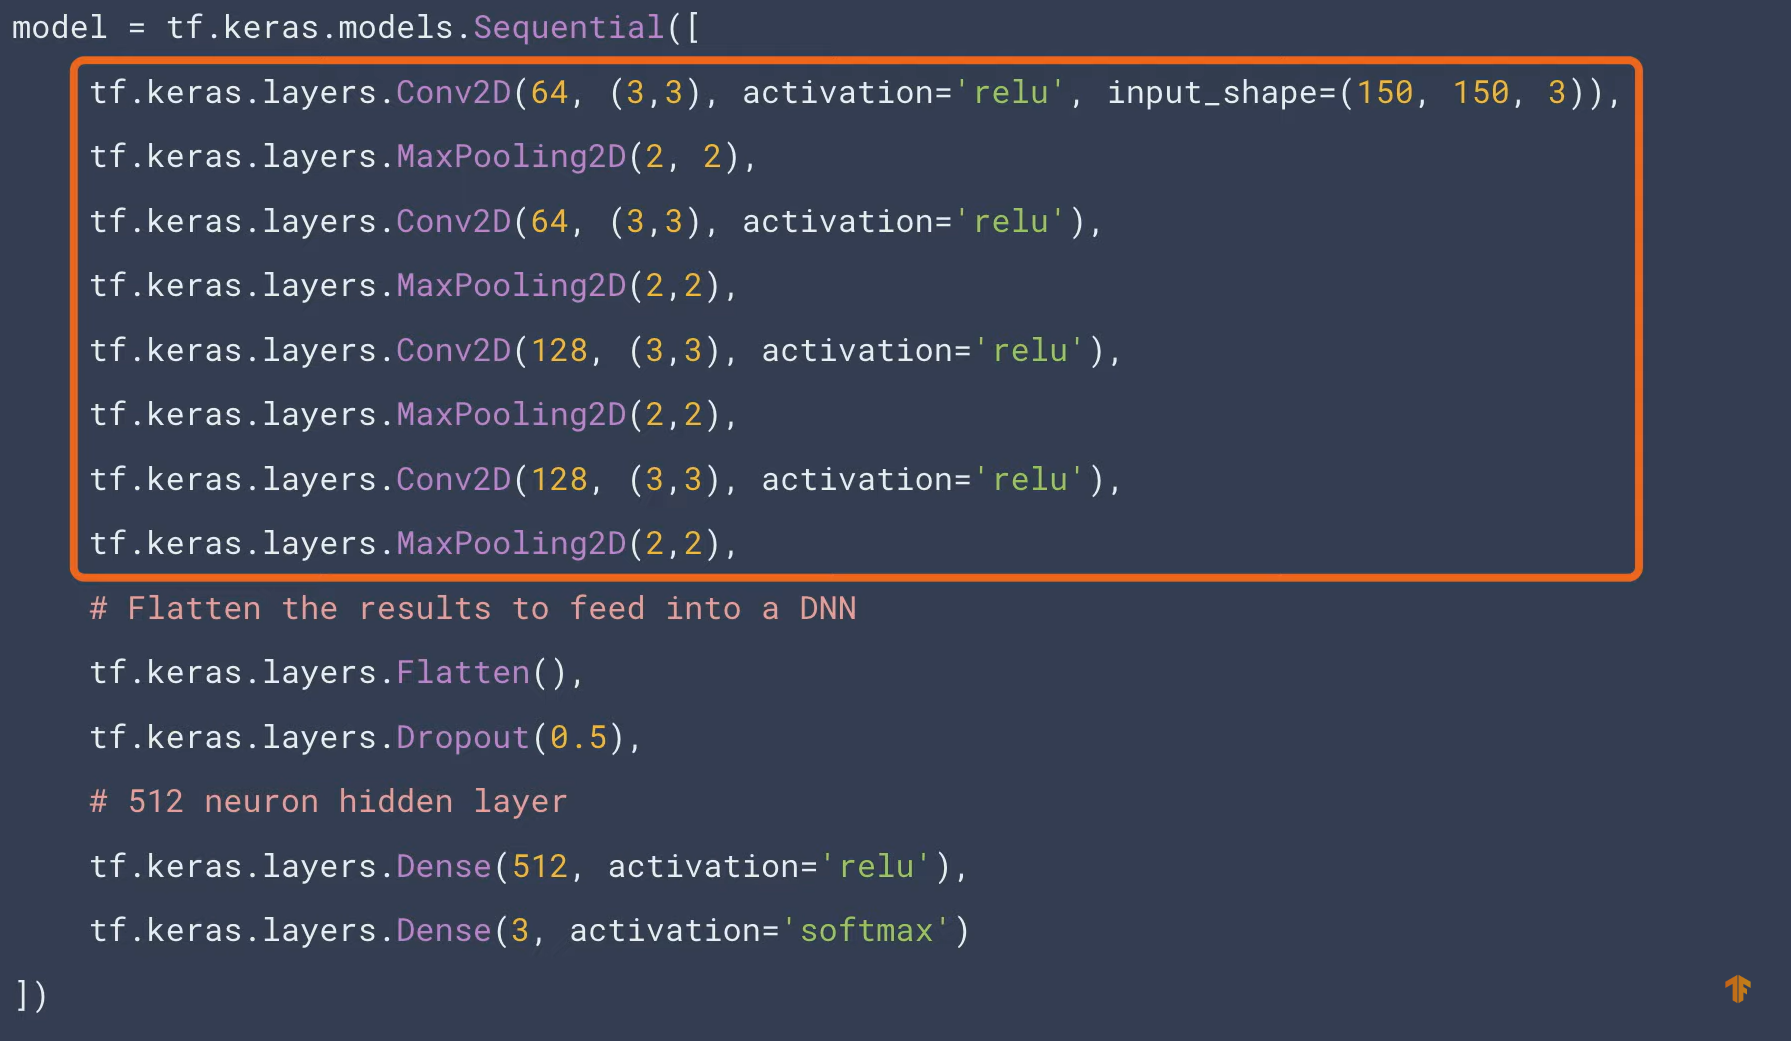

In [7]:
conjunto_treinamento=np.load("conjunto_treinamento.npy")
conjunto_teste=np.load("conjunto_teste.npy")
print(conjunto_treinamento.shape)
print(conjunto_teste.shape)

(5000, 3)
(1000, 3)


In [16]:
history=model_2.fit(imagens_array,conjunto_treinamento,epochs=30,validation_data=(imagens_array_teste, conjunto_teste))

Epoch 1/30
157/157 [==============================] - 115s 729ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0426 - val_accuracy: 1.0000
Epoch 2/30
157/157 [==============================] - 113s 717ms/step - loss: 0.0228 - accuracy: 1.0000 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 3/30
157/157 [==============================] - 113s 717ms/step - loss: 0.0214 - accuracy: 1.0000 - val_loss: 0.0400 - val_accuracy: 1.0000
Epoch 4/30
157/157 [==============================] - 113s 719ms/step - loss: 0.0216 - accuracy: 1.0000 - val_loss: 0.0365 - val_accuracy: 1.0000
Epoch 5/30
157/157 [==============================] - 113s 719ms/step - loss: 0.0213 - accuracy: 1.0000 - val_loss: 0.0383 - val_accuracy: 1.0000
Epoch 6/30
157/157 [==============================] - 113s 717ms/step - loss: 0.0201 - accuracy: 1.0000 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 7/30
157/157 [==============================] - 113s 721ms/step - loss: 0.0212 - accuracy: 1.0000 - val_loss: 0.0408 -

### 3º Avaliamos o modelo treinado no conjunto de teste

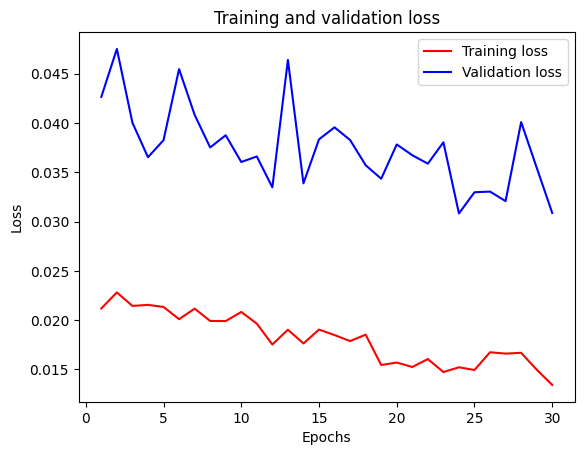

In [17]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

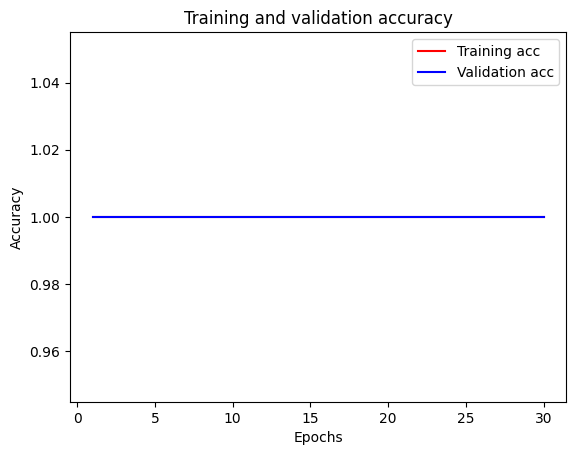

32/32 [==============================] - 6s 199ms/step - loss: 0.0309 - accuracy: 1.0000
0.0308732520788908
1.0


In [18]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


loss, accuracy = model_2.evaluate(imagens_array_teste, conjunto_teste)
print(loss)
print(accuracy)

In [19]:
y_3=model_2.predict(imagens_array_teste)
np.set_printoptions(threshold=np.inf)

print(y_3)



32/32 [==============================] - 6s 199ms/step
[[ 1.89570503e+01  6.84422180e-02  5.60546219e-02]
 [ 5.56042624e+00  3.49041149e-02  2.30156276e-02]
 [ 1.39723647e+00  3.56826112e-02  4.77709882e-02]
 [ 1.08322239e+00  8.18660781e-02  5.25643341e-02]
 [ 2.24022889e+00  8.95325169e-02  4.91834991e-02]
 [ 2.42230320e+00  9.16162059e-02  7.20890239e-02]
 [ 1.26926887e+00  9.27657411e-02  6.98827580e-02]
 [ 3.29081464e+00  1.07645117e-01  2.80398224e-02]
 [ 2.54884911e+00  8.06013271e-02  4.22958843e-02]
 [ 1.73899651e+00  8.55294690e-02  8.44867900e-02]
 [ 1.64881802e+01  8.00074935e-02 -2.73086643e-03]
 [ 1.60714817e+00  6.46444187e-02  3.65315191e-02]
 [ 1.55619116e+01  6.35327846e-02  1.29295681e-02]
 [ 1.06325617e+01  9.46064442e-02  6.11912124e-02]
 [ 1.43131113e+00  6.79458901e-02  7.95450285e-02]
 [ 2.01242995e+00  1.04648881e-01  3.08750961e-02]
 [ 9.31951618e+00  7.84537494e-02  1.36093590e-02]
 [ 2.28498030e+00  6.99520931e-02  4.50691096e-02]
 [ 2.37991595e+00  6.966608

In [12]:
print(conjunto_teste)

[[1.90032660e+01 7.12613641e-02 7.53084094e-02]
 [4.61209190e+00 1.95299650e-02 3.14193635e-02]
 [1.43450865e+00 2.49705049e-02 4.85363564e-02]
 [1.11398215e+00 6.38473009e-02 5.56996300e-02]
 [2.29133298e+00 7.82588425e-02 5.04336568e-02]
 [2.26566240e+00 7.15026229e-02 8.98421522e-02]
 [1.29015306e+00 8.09218333e-02 6.89083076e-02]
 [3.24606439e+00 9.96215205e-02 3.78190176e-02]
 [2.47735425e+00 7.08226381e-02 4.61587123e-02]
 [1.73208276e+00 6.87077311e-02 9.15950200e-02]
 [1.64637648e+01 7.67574642e-02 2.10150081e-02]
 [1.66268958e+00 4.96959667e-02 4.25027183e-02]
 [1.56004891e+01 8.70636084e-02 2.95158249e-02]
 [1.04352837e+01 9.98571140e-02 6.43045946e-02]
 [1.43613473e+00 5.35986178e-02 7.98517435e-02]
 [2.00026750e+00 8.94037861e-02 2.96758213e-02]
 [1.24967293e+01 9.37402714e-02 2.13394533e-02]
 [2.25571551e+00 5.90974272e-02 4.64608555e-02]
 [2.38572915e+00 5.84947586e-02 2.68217508e-02]
 [1.58408706e+00 2.49646813e-02 3.97927481e-02]
 [3.17643631e+00 7.45932725e-02 2.956943

 [2.77697383e+00 9.05982067e-02 4.69902359e-02]]


In [20]:
model_2.save('rede_treinada')

INFO:tensorflow:Assets written to: rede_treinada\assets


INFO:tensorflow:Assets written to: rede_treinada\assets


## 4º A seguir iremos ver os 30 primeiros gráficos gerados pelo conjunto original em comparação com o conjunto que o modelo previu.

In [34]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  4 21:21:44 2020

@author: Edson Porto da Silva
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import signal

def simulador(R,L,C,r,l,c,a):
    
    # Resolução numérica de um circuito RLC série alimentado por uma onda quadrada
    # de tensão.
    # ANTES ERA FQ = 4 E T DE 0 A 5
    # parâmetros do circuito:
    V0 = 0                # tensão inicial no capacitor [volts]
    I0 = 0                # corrente inicial no indutor [ampères]
    fq = 1               # frequência da onda quadrada [hertz]
    Vq = 15               # amplitude da onda quadrada [volts]
    w0 = 1/np.sqrt(L*C)   # frequência angular de ressonância [rad/segundo]

    t = np.arange(0,10,0.0001)*(2/10)   # discretização do intervalo de tempo [segundos]
    Vs = Vq*signal.square(2*np.pi*fq*t) # onda quadrada na entrada do circuito

    vC    = np.zeros(len(t))
    x     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC[0] = V0       # condição incial de vc
    x[0]  = I0/C     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC[kk+1] = vC[kk]+x[kk]*deltaT                                # calcula vc(t+deltaT)
        x[kk+1]  = x[kk]+(-R/L*x[kk]-1/(L*C)*(vC[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i  = np.append(I0, C*np.diff(vC)/deltaT)    # corrente no circuito
    
    vR = R*i                                    # tensão no resistor
    vL = Vs-vR-vC                               # tensão no indutor(LKT)
    
    ###--------------------------------------------------------------###
    
    vC1    = np.zeros(len(t))
    x1     = np.zeros(len(t))

    # EDO da tensão sobre o capacitor: vc''(t)+(R/L)vc'(t)+vc(t)/LC = vs/LC

    # Solução numérica:
    vC1[0] = V0       # condição incial de vc
    x1[0]  = I0/c     # condição inicial da derivada vc'(t)
    #
    # Integração numérica via método de Euler:
    deltaT    = t[1]-t[0] # passo de integração
    numPoints = len(t)-1

    for kk in range(0, numPoints):
        vC1[kk+1] = vC1[kk]+x1[kk]*deltaT                                # calcula vc(t+deltaT)
        x1[kk+1]  = x1[kk]+(-r/l*x1[kk]-1/(l*c)*(vC1[kk]-Vs[kk]))*deltaT  # calcula vc'(t+deltaT)

    # cálculo das tensões e da corrente partir de vc(t):
    i1  = np.append(I0, c*np.diff(vC1)/deltaT)    # corrente no circuito
    
    vR1 = r*i1                                    # tensão no resistor
    vL1 = Vs-vR1-vC1                               # tensão no indutor(LKT)
    
    
    
    if a ==1:
        
        plt.figure(1, figsize=(8, 5), dpi=100, facecolor='w', edgecolor='k')
        plt.subplot(1, 2, 1)
        plt.plot(t, i,color="black")
        #plt.legend(['corrente i(t)']);
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        #plt.ylabel('ampères (A)', fontsize = 14)
        #plt.xlabel('tempo (s)', fontsize = 14)
        #plt.title('Corrente no circuito RLC série', fontsize = 14)
        plt.subplot(1, 2, 2)
        plt.plot(t, i1,color="black")
        plt.grid(color='k', linestyle='--', linewidth=0.1)
        plt.tight_layout()

        plt.show(block=False)
            


Figura: 0


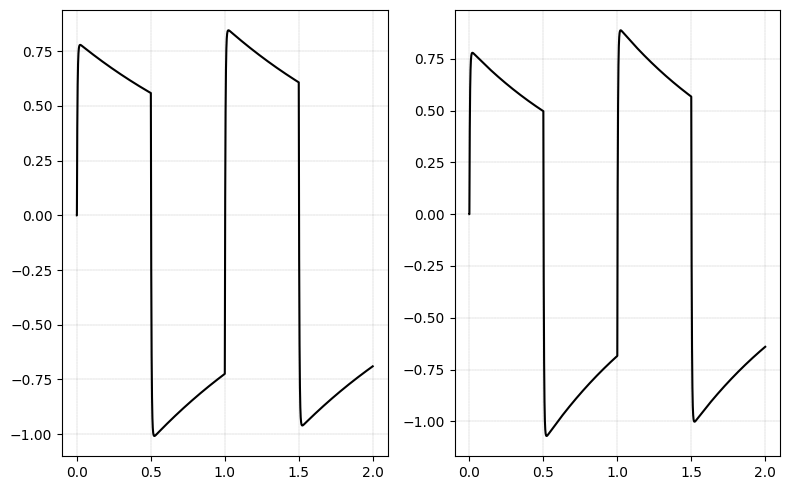

Figura: 1


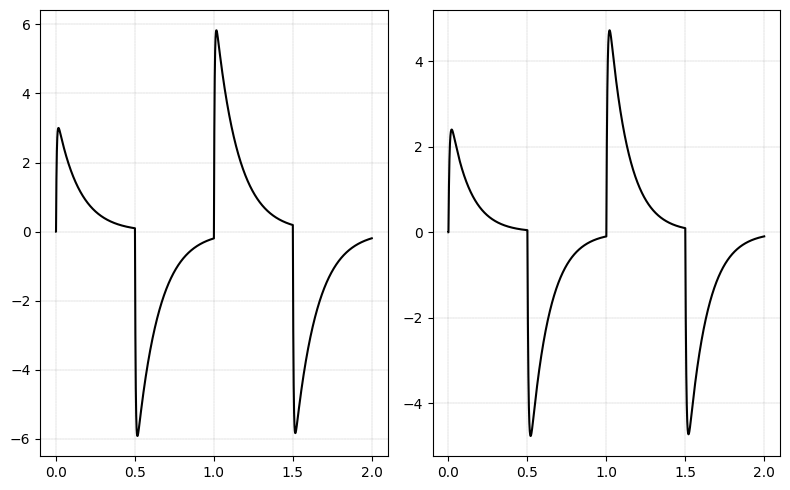

Figura: 2


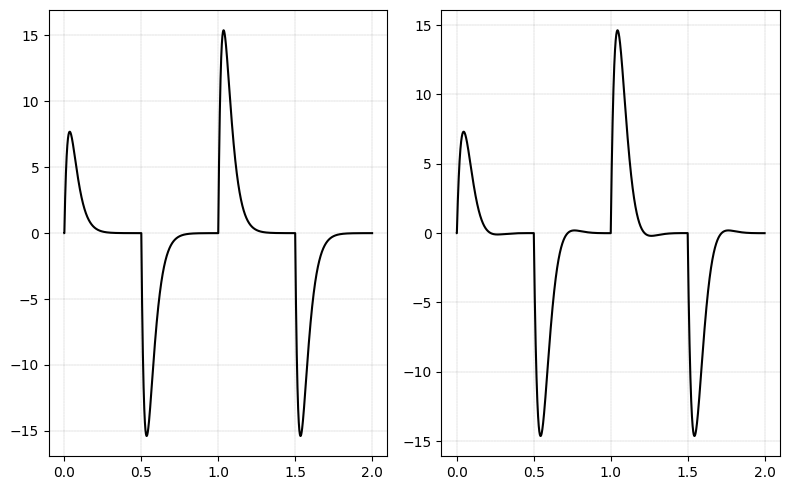

Figura: 3


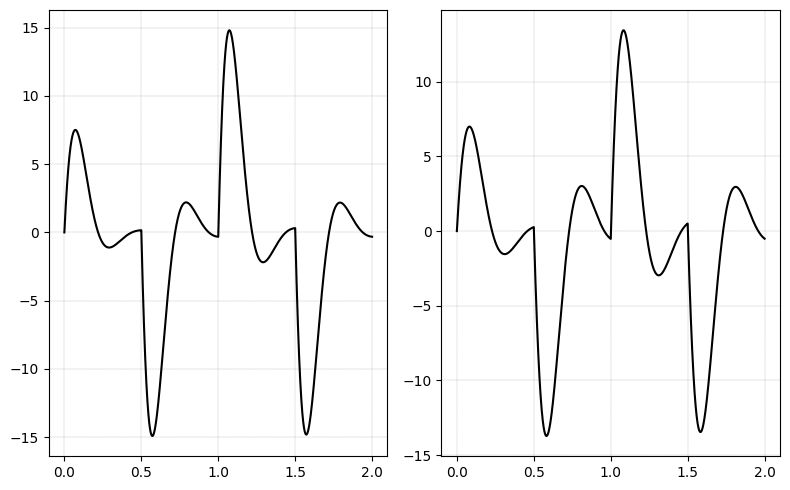

Figura: 4


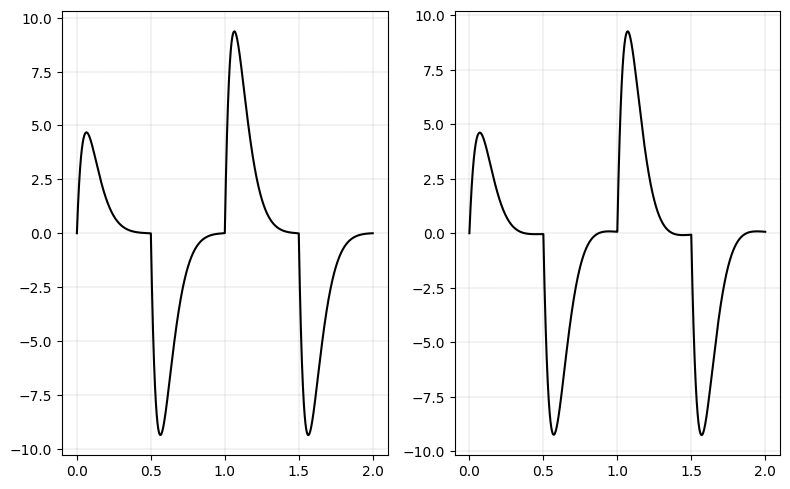

Figura: 5


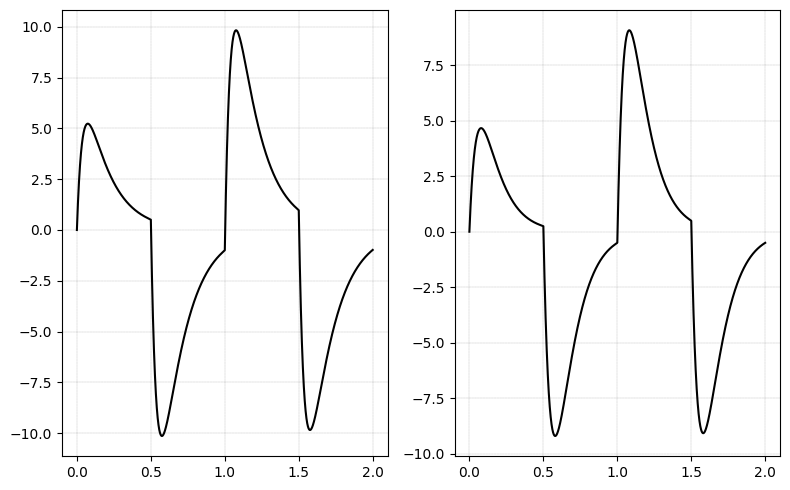

Figura: 6


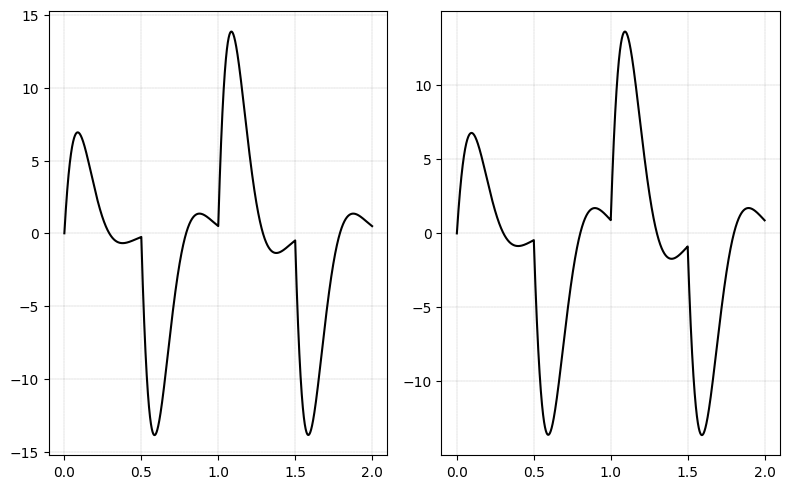

Figura: 7


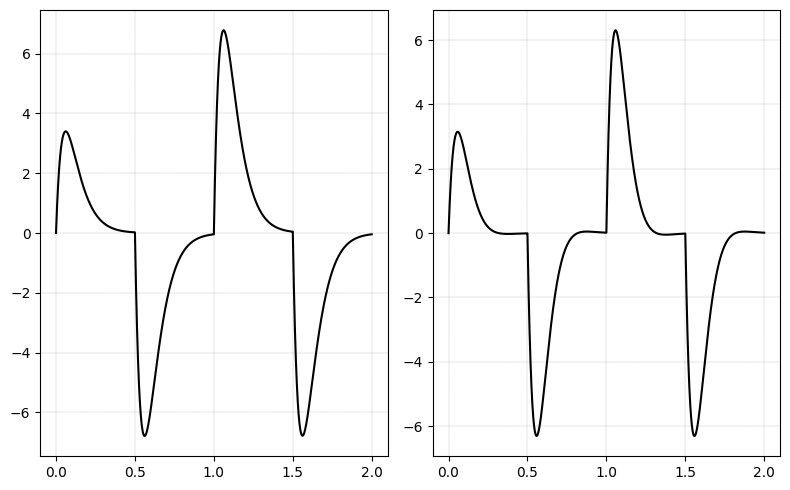

Figura: 8


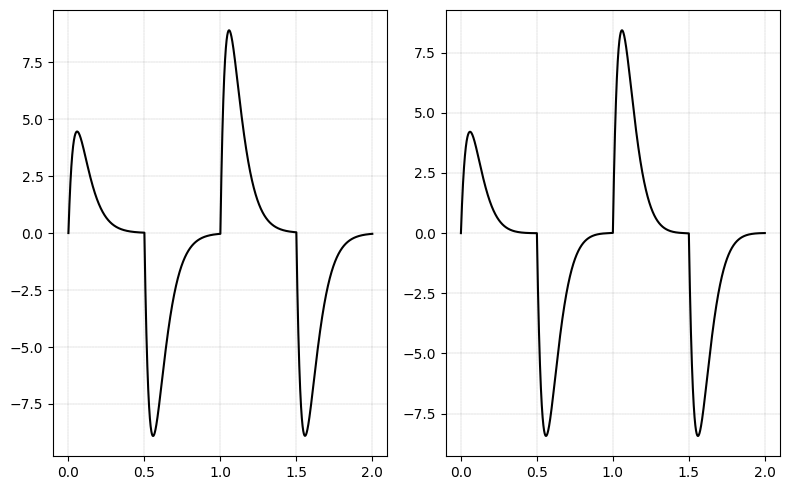

Figura: 9


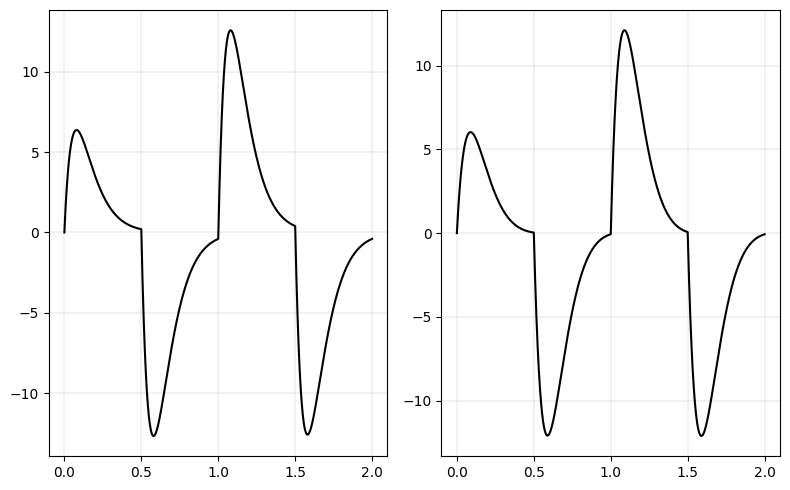

Figura: 10


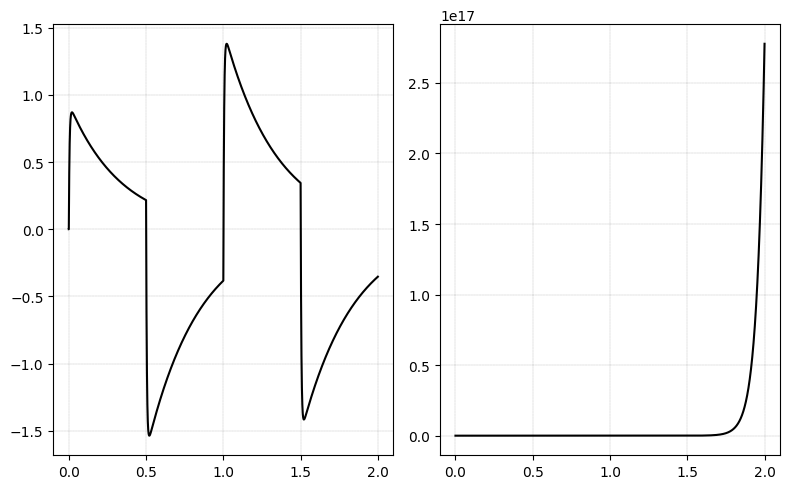

Figura: 11


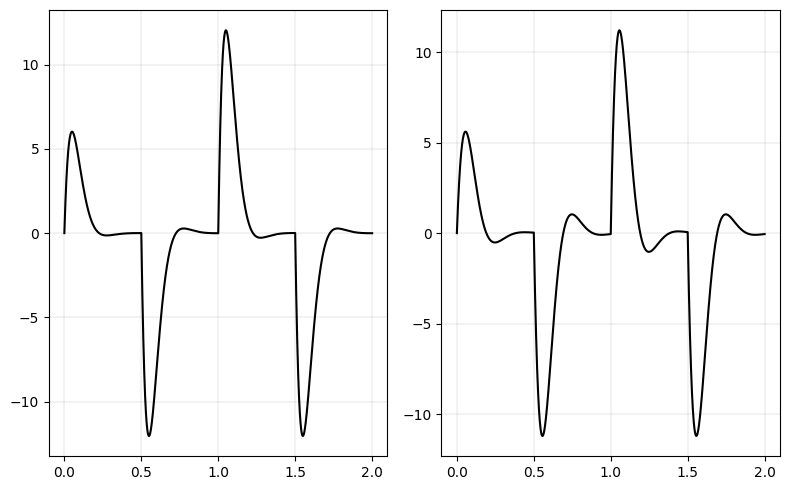

Figura: 12


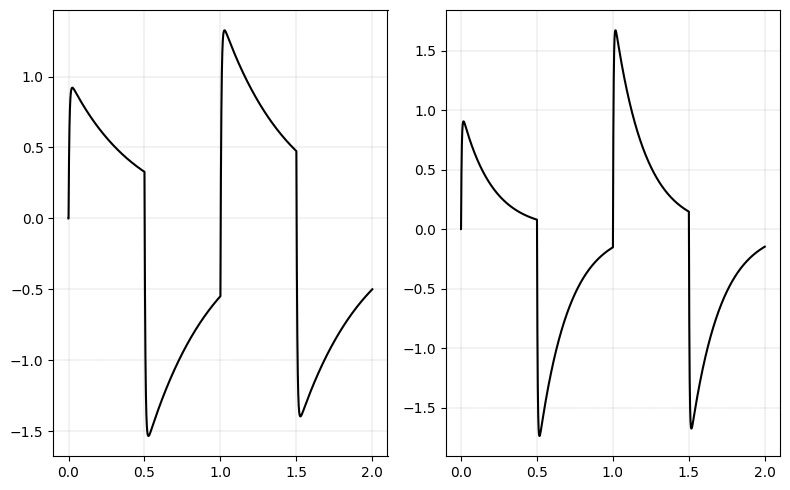

Figura: 13


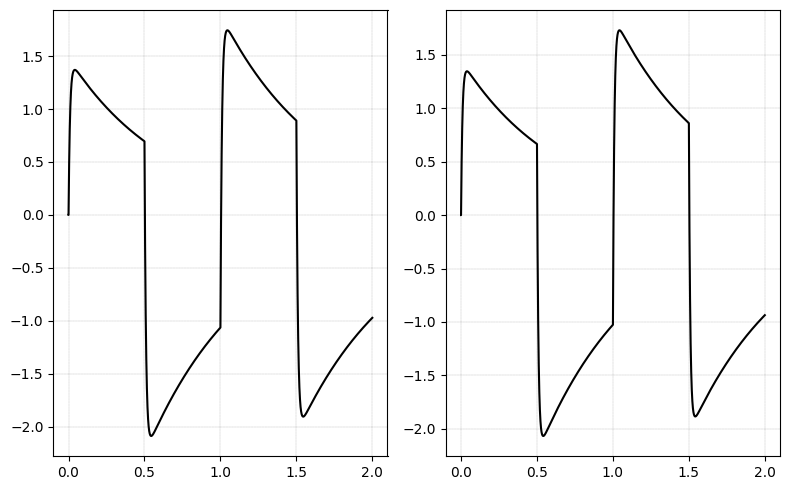

Figura: 14


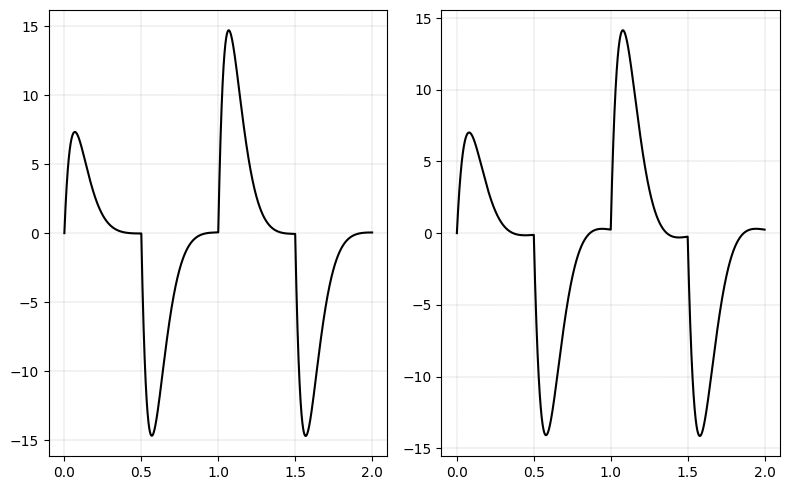

Figura: 15


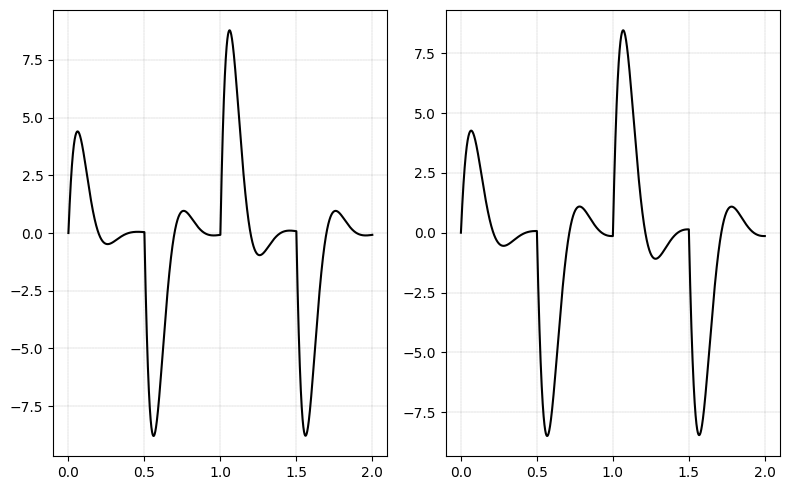

Figura: 16


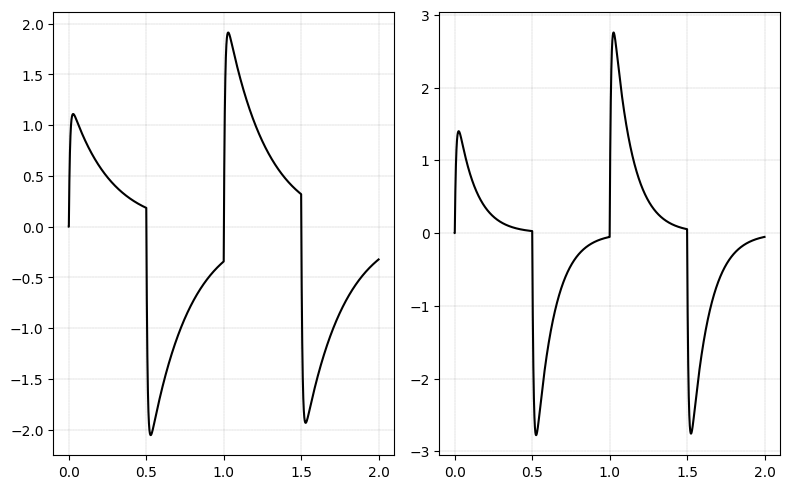

Figura: 17


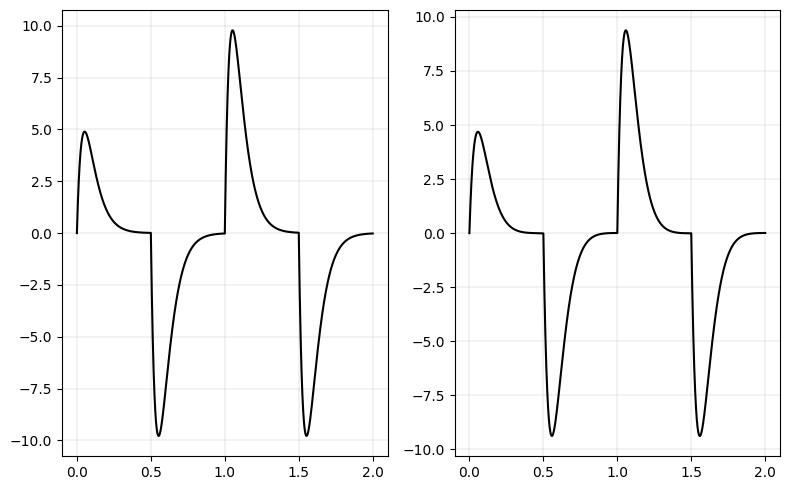

Figura: 18


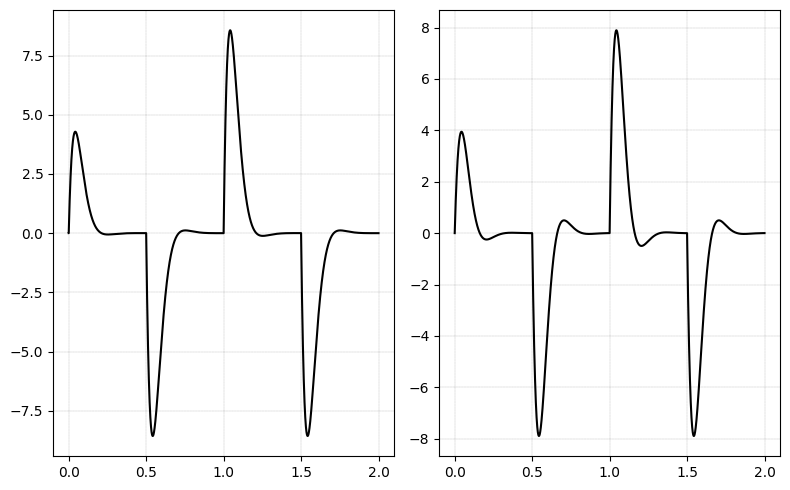

Figura: 19


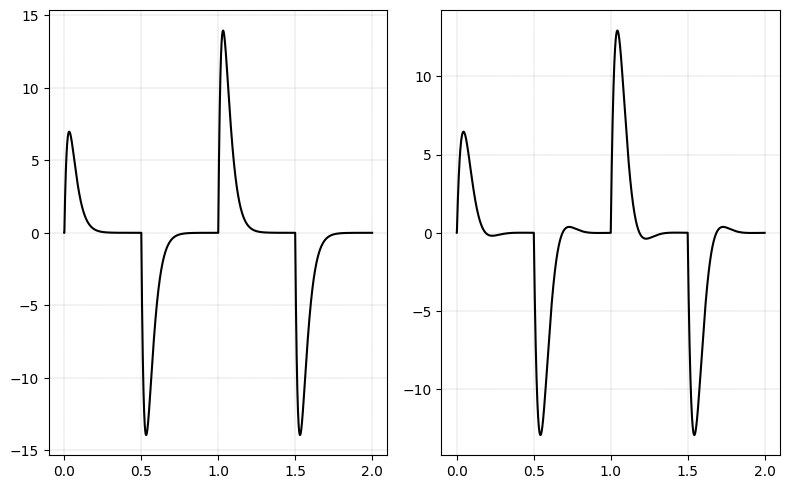

Figura: 20


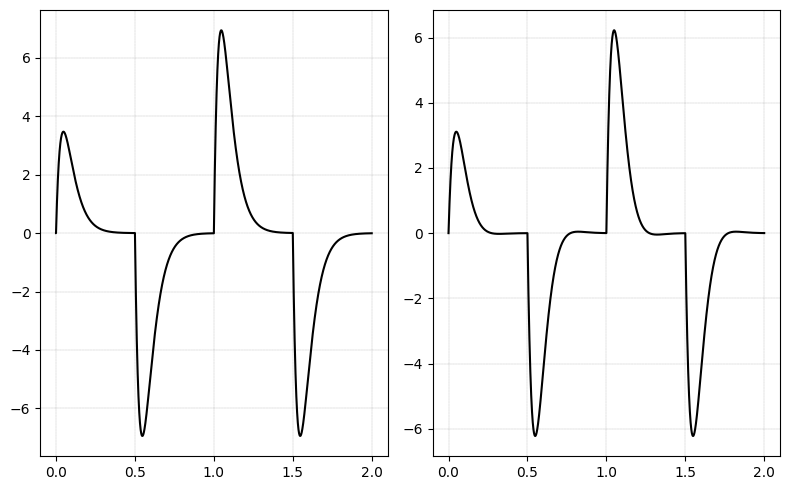

Figura: 21


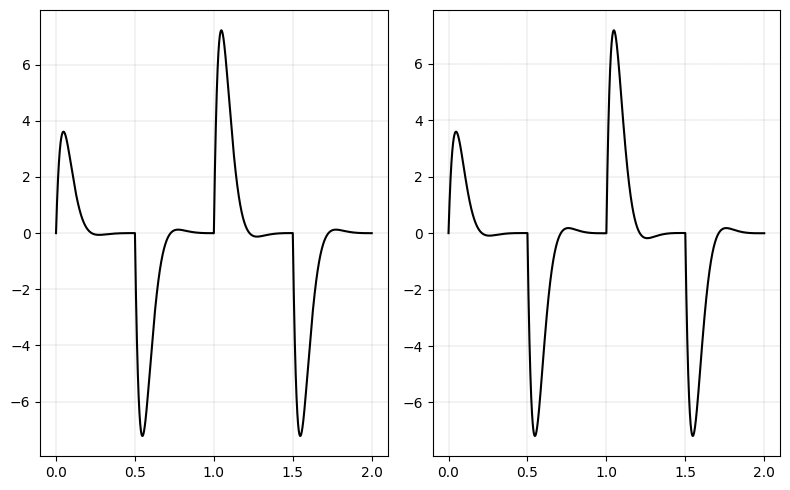

Figura: 22


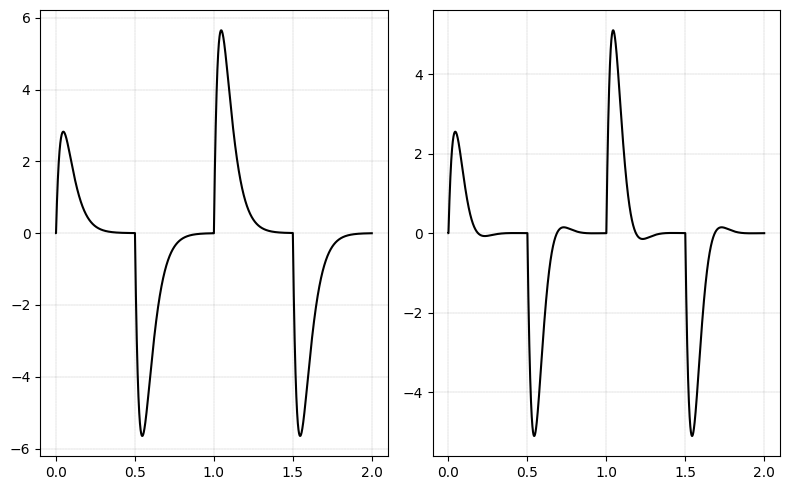

Figura: 23


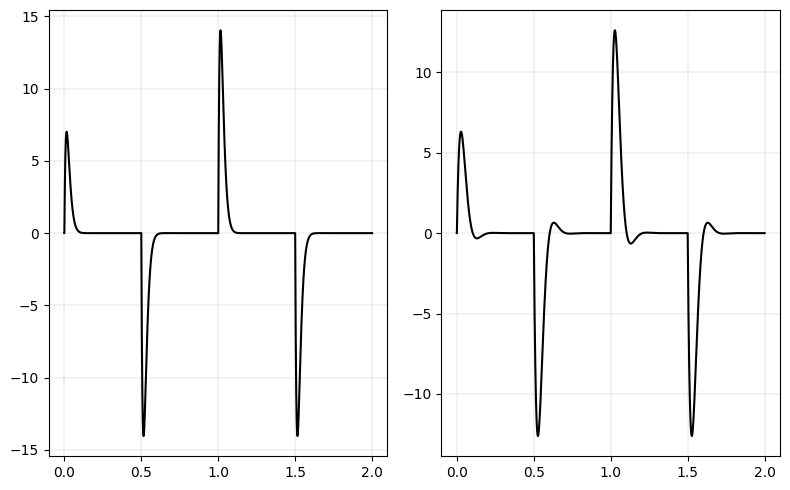

Figura: 24


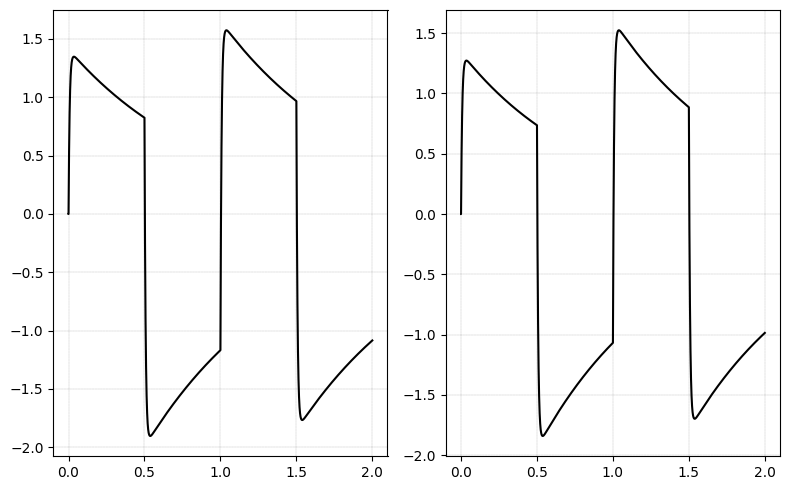

Figura: 25


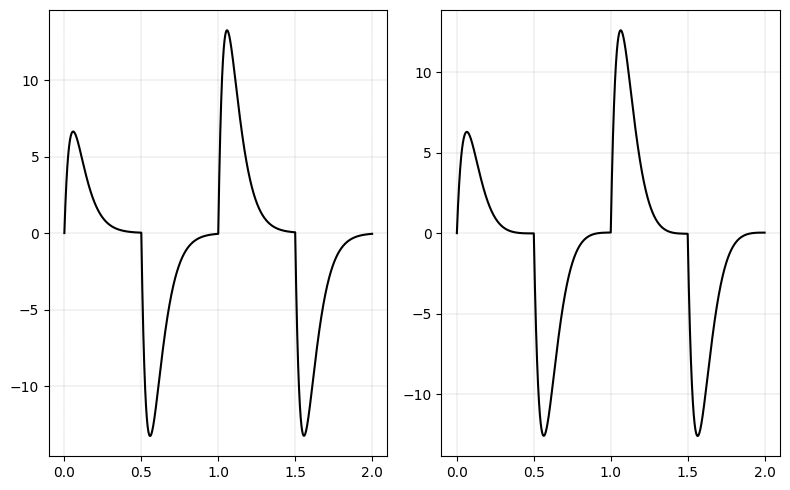

Figura: 26


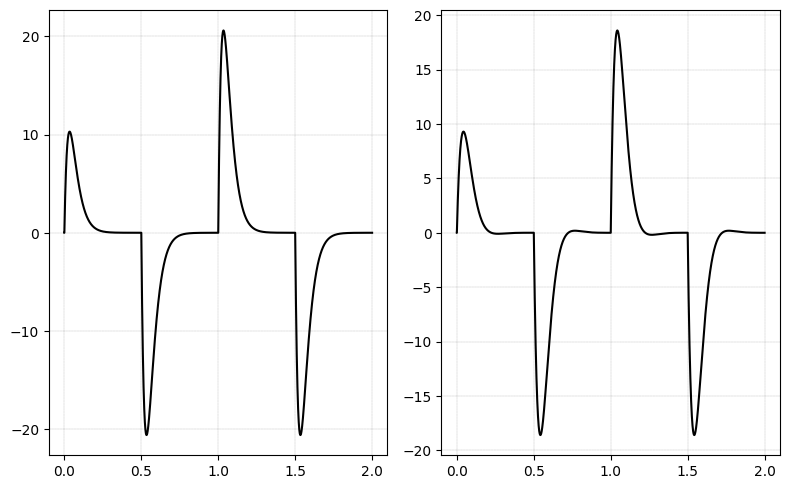

Figura: 27


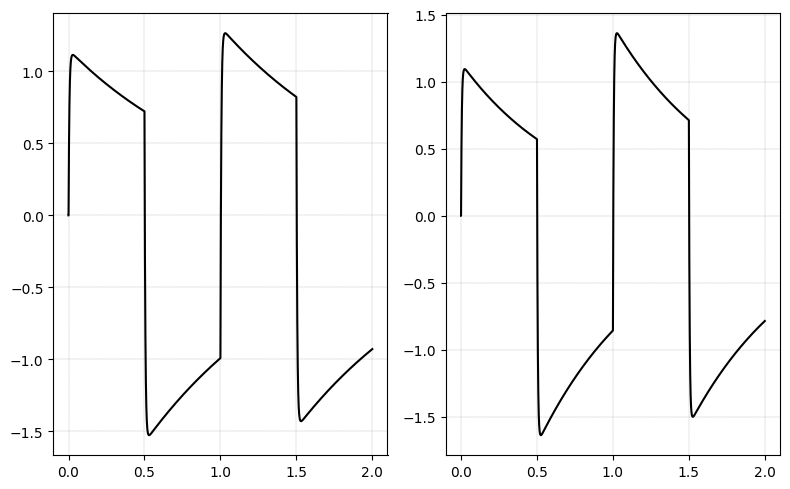

Figura: 28


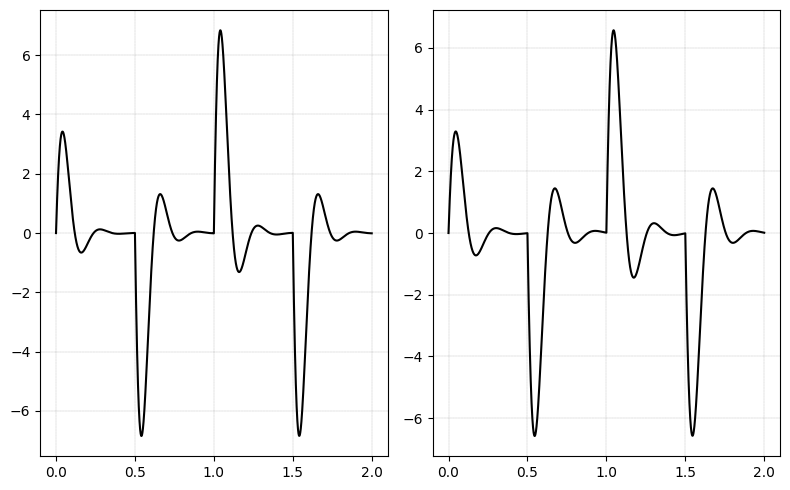

Figura: 29


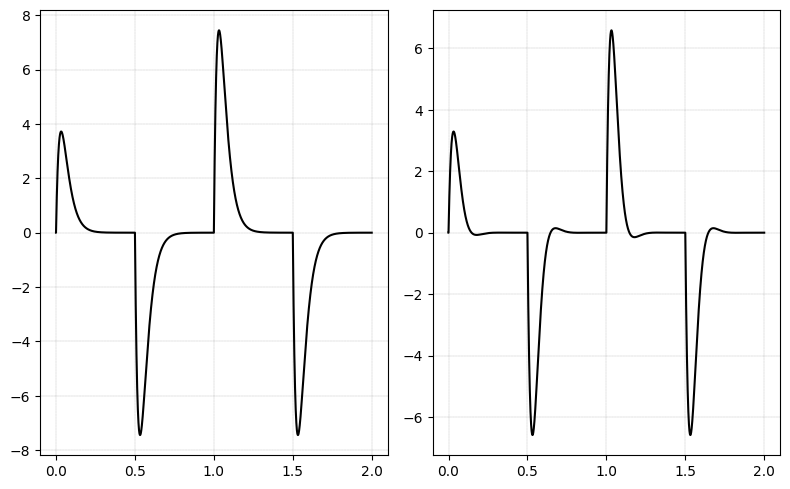

In [36]:
for i in range (30):
    print("Figura:",i)
    simulador(conjunto_teste[i,0],conjunto_teste[i,1],conjunto_teste[i,2],y_3[i,0],y_3[i,1],y_3[i,2],1)